In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# scikitlearn packages for further statistical learning from the dataset
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity
#ast for safe evaluation of string representation of dicts and lists
import ast

In [2]:
#creating all the dataframes
df_year = pd.read_csv('data_by_year.csv')
print(df_year.head())

df_genres = pd.read_csv('data_by_genres.csv')
print(df_genres.head())

df_artist = pd.read_csv('data_by_artist.csv')
print(df_artist.head())

df_data = pd.read_csv('data.csv')
print(df_data.head())

   mode  year  acousticness  danceability    duration_ms    energy  \
0     1  1921      0.886896      0.418597  260537.166667  0.231815   
1     1  1922      0.938592      0.482042  165469.746479  0.237815   
2     1  1923      0.957247      0.577341  177942.362162  0.262406   
3     1  1924      0.940200      0.549894  191046.707627  0.344347   
4     1  1925      0.962607      0.573863  184986.924460  0.278594   

   instrumentalness  liveness   loudness  speechiness       tempo   valence  \
0          0.344878  0.205710 -17.048667     0.073662  101.531493  0.379327   
1          0.434195  0.240720 -19.275282     0.116655  100.884521  0.535549   
2          0.371733  0.227462 -14.129211     0.093949  114.010730  0.625492   
3          0.581701  0.235219 -14.231343     0.092089  120.689572  0.663725   
4          0.418297  0.237668 -14.146414     0.111918  115.521921  0.621929   

   popularity  key  
0    0.653333    2  
1    0.140845   10  
2    5.389189    0  
3    0.661017   10  

In [3]:
## DATA CLEANING

In [14]:
#checking and filling in for missing values
for col in df_artist.columns:
    if df_artist[col].isnull().any():
        print(f"Missing values are found in the df_artist column '{col}'.")
        if pd.api.types.is_numeric_dtype(df_artist[col]):
            df_artist[col].fillna(df_artist[col].mean(), inplace = True)
        else:
            df_artist[col].fillna(df_artist[col].mode()[0], inplace = True)

for col in df_year.columns:
    if df_year[col].isnull().any():
        print(f"Missing values are found in the df_year column '{col}'.")
        if pd.api.types.is_numeric_dtype(df_year[col]):
            df_artist[col].fillna(df_year[col].mean(), inplace = True)
        else:
            df_artist[col].fillna(df_year[col].mode()[0], inplace = True)

for col in df_genres.columns:
    if df_genres[col].isnull().any():
        print(f"Missing values are found in the df_genres column '{col}'.")
        if pd.api.types.is_numeric_dtype(df_genres[col]):
            df_artist[col].fillna(df_genres[col].mean(), inplace = True)
        else:
            df_artist[col].fillna(df_genres[col].mode()[0], inplace = True)

for col in df_data.columns:
    if df_data[col].isnull().any():
        print(f"Missing values are found in the df_data column '{col}'.")
        if pd.api.types.is_numeric_dtype(df_data[col]):
            df_artist[col].fillna(df_data[col].mean(), inplace = True)
        else:
            df_artist[col].fillna(df_data[col].mode()[0], inplace = True)

In [5]:
#removing redundant records
df_artist.drop_duplicates(inplace = True)
df_year.drop_duplicates(inplace = True)
df_genres.drop_duplicates(inplace = True)
df_data.drop_duplicates(inplace = True)


#cleaning all the dataframes
dataframes = {
    'main': df_data,
    'year': df_year,
    'artist': df_artist,
    'genre':df_genres
}

#stripping off the whitespace and lowercase strings in the object columns
for name, df in dataframes.items():
    for col in df.select_dtypes(include='object').columns:
        df[col]=df[col].astype(str).str.strip().str.lower()
    print(f"Cleaned {name} DataFrame")

Cleaned main DataFrame
Cleaned year DataFrame
Cleaned artist DataFrame
Cleaned genre DataFrame


In [6]:
#EDA ~ explore through each dataset to see contents & get insights 

In [25]:
#creating a function to analyse all the dataframes
def analyse_dataframes(df, df_name):
    print(f"analysingDataframe: {df_name}")
    print(f"Shape: {df.shape}")
    print(f"Columns: {df.columns.tolist()}")
    print(f"Missing values: {df.isnull().sum().sum()}")
    print(f"Data types:\n{df.dtypes}")
    print(f"First 5 rows:\n{df.head()}")
    print("\n")
    print(df.isnull().sum())
    print("\nDescriptive Statistics:")
    print(df.describe(include='all'))

In [17]:
#create a list of audio features from observaytions of data.csv for easier feature selection
audioFeatures = ['acoustisness', 'danceability', 'duration_ms', 'energy', 
                'instrumentalness', 'loudness', 'liveness', 'speechiness', 
                'tempo', 'valence', 'popularity', 'key', 'mode', 'time_period']

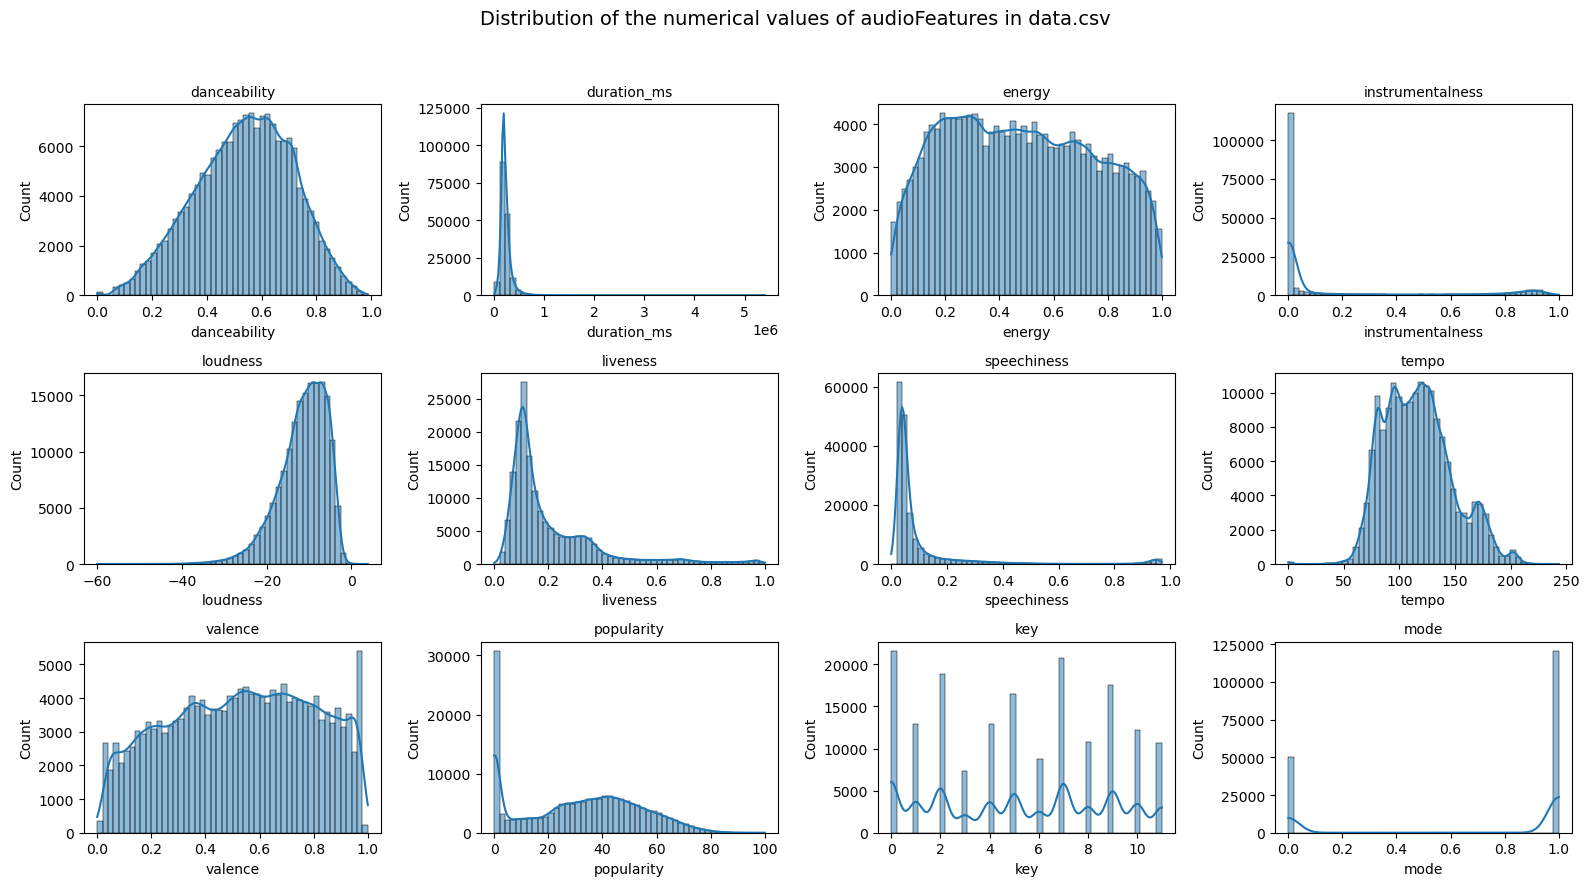

In [18]:
#Distributing the numerical values of audioFeatures
availableAudioFeatures = [col for col in audioFeatures if col in df_data.columns if df_data[col].dtype in ['int64', 'float64']]

#setting up one big figure to plot all the graphs in
n=len(availableAudioFeatures)
ncols=4
nrows=(n+ncols-1)//ncols
fig, axes=plt.subplots(nrows,ncols,figsize=(4*ncols,3*nrows))

#drawing eaxh subplot by looping over the features
for ax, col in zip(axes.flatten(), availableAudioFeatures):
        sns.histplot(df_data[col], kde=True,bins=50,ax=ax)
        ax.set_title(col, fontsize=10)
for ax in axes.flatten()[n:]:
    ax.axis('off')
    #layout ajustments and by keeping it outside the loop
fig.suptitle("Distribution of the numerical values of audioFeatures in data.csv", fontsize=14)
fig.tight_layout(rect=[0,0,1,0.95])#leaving enuf space for title
plt.show()

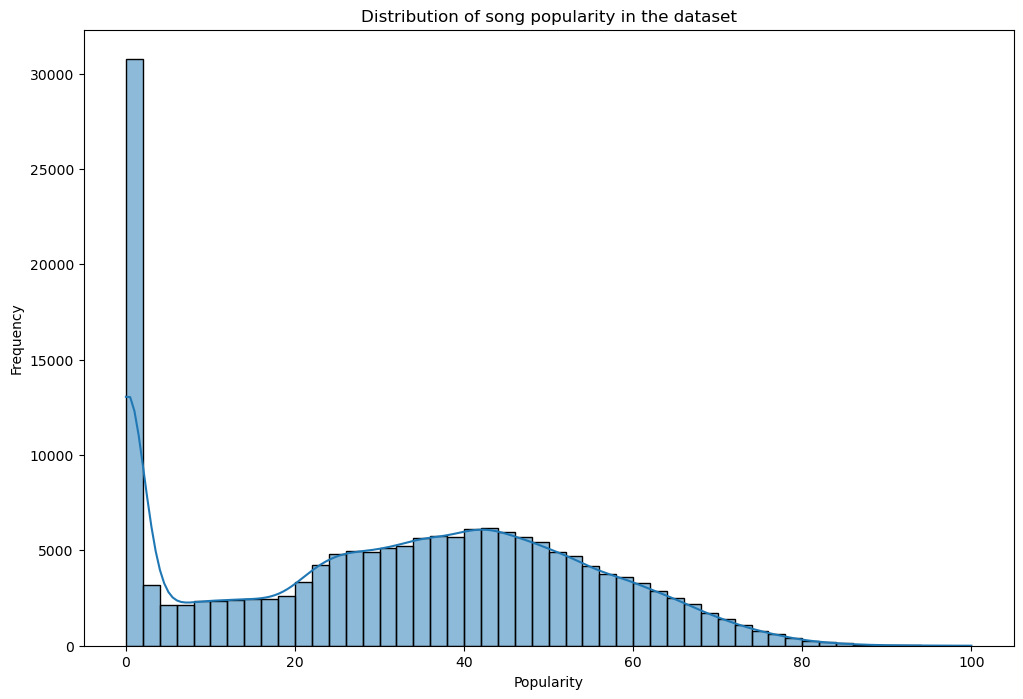

Popularity Stats:
count    170653.000000
mean         31.431794
std          21.826615
min           0.000000
25%          11.000000
50%          33.000000
75%          48.000000
max         100.000000
Name: popularity, dtype: float64 


In [10]:
#plotting the Popularity Distributions
plt.figure(figsize=(12,8))
sns.histplot(df_data['popularity'], kde=True, bins=50)
plt.title('Distribution of song popularity in the dataset')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()
print(f"Popularity Stats:\n{df_data['popularity'].describe()} ")

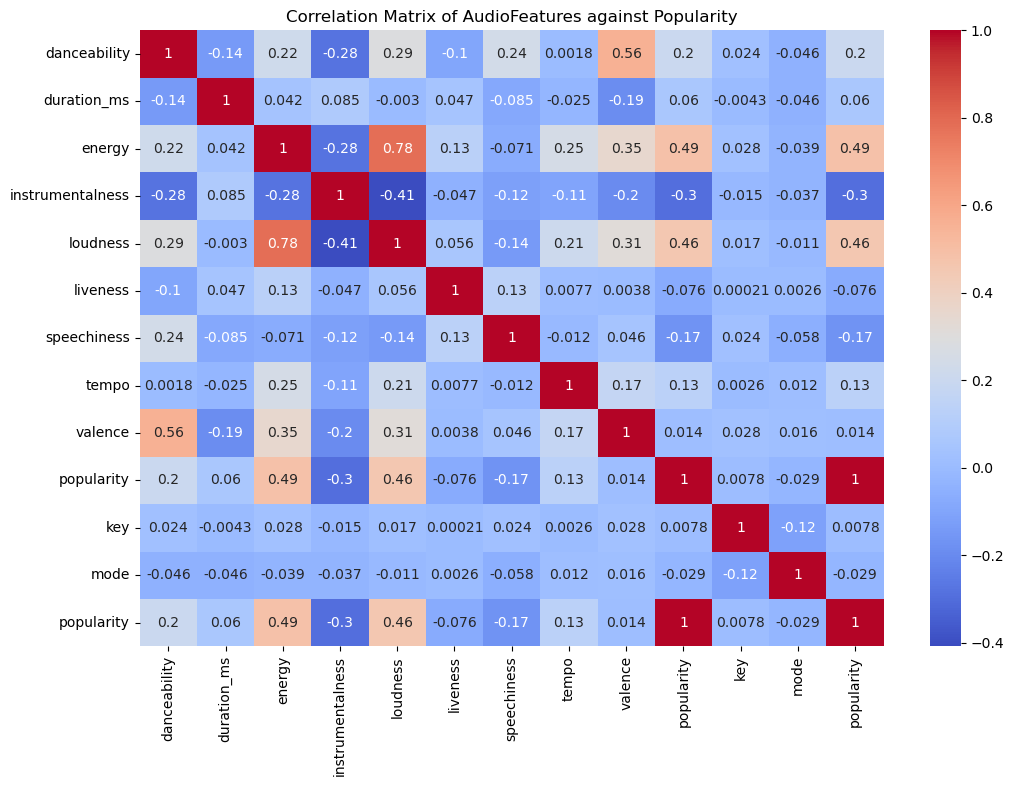

In [11]:
#CORRELATION of audioFeatures & Popularity
correlationFeature = audioFeatures+['popularity']
correlationFeature = [f for f in correlationFeature if f in df_data.columns and df_data[f].dtype in ['int64', 'float64']]
corrMatrrix = df_data[correlationFeature].corr()
plt.figure(figsize=(12,8))
sns.heatmap(corrMatrrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of AudioFeatures against Popularity")
plt.show()

successfully parsed artists column and made a list of the most popular artist

Top10 most played popularArtists:
popularArtists
francisco canaro           2227
эрнест хемингуэй           1211
эрих мария ремарк          1068
frédéric chopin            1016
wolfgang amadeus mozart     920
johann sebastian bach       901
ludwig van beethoven        886
frank sinatra               738
billie holiday              680
igor stravinsky             637
Name: count, dtype: int64


/var/folders/d4/p2z3x9r14n98_xbhnc9nbnzw0000gn/T/ipykernel_78412/1842427814.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Popular_artists.values, y= Popular_artists.index, palette='viridis')


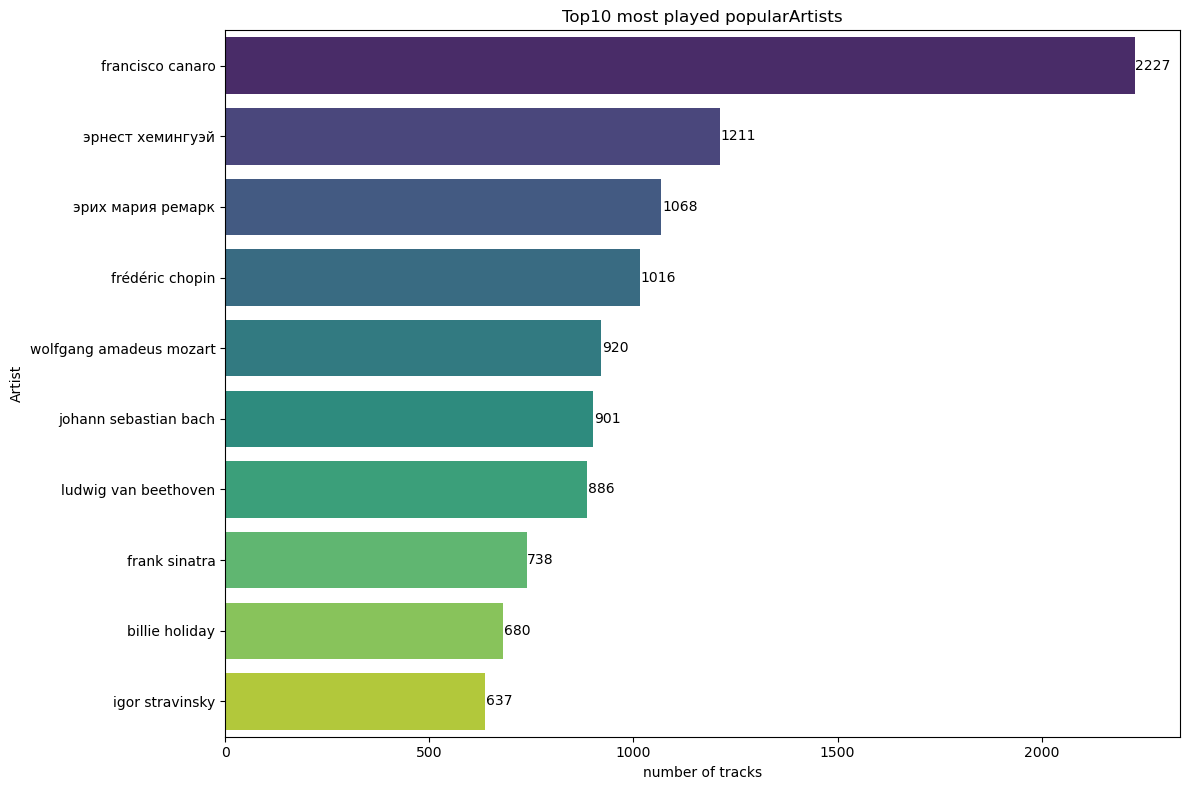

In [19]:
#PARSING 'artist' column to create a list of Populart artists
df_data['parsedArtists']=df_data['artists'].apply(lambda x: ast.literal_eval(x))
df_data['popularArtists']=df_data['parsedArtists'].apply(lambda x: x[0] if isinstance(x, list) and len(x)> 0 else None)
print("successfully parsed artists column and made a list of the most popular artist")
print("\nTop10 most played popularArtists:")
print(df_data['popularArtists'].value_counts().nlargest(10))


#plotting it in a graph
Popular_artists = df_data['popularArtists'].value_counts().nlargest(10)
plt.figure(figsize=(12,8))
sns.barplot(x=Popular_artists.values, y= Popular_artists.index, palette='viridis')
plt.title('Top10 most played popularArtists', fontsize=12)
plt.xlabel('number of tracks')
plt.ylabel('Artist')
for i, value in enumerate(Popular_artists.values):
    plt.text(value +2, i, str(value), va='center')
plt.tight_layout()
plt.show()


-- Data by YEAR from the dataset data_by_year.csv --
Shape: (100, 14)
<bound method NDFrame.head of     mode  year  acousticness  danceability    duration_ms    energy  \
0      1  1921      0.886896      0.418597  260537.166667  0.231815   
1      1  1922      0.938592      0.482042  165469.746479  0.237815   
2      1  1923      0.957247      0.577341  177942.362162  0.262406   
3      1  1924      0.940200      0.549894  191046.707627  0.344347   
4      1  1925      0.962607      0.573863  184986.924460  0.278594   
..   ...   ...           ...           ...            ...       ...   
95     1  2016      0.284171      0.600202  221396.510295  0.592855   
96     1  2017      0.286099      0.612217  211115.696787  0.590421   
97     1  2018      0.267633      0.663500  206001.007133  0.602435   
98     1  2019      0.278299      0.644814  201024.788096  0.593224   
99     1  2020      0.219931      0.692904  193728.397537  0.631232   

    instrumentalness  liveness   loudness  spe

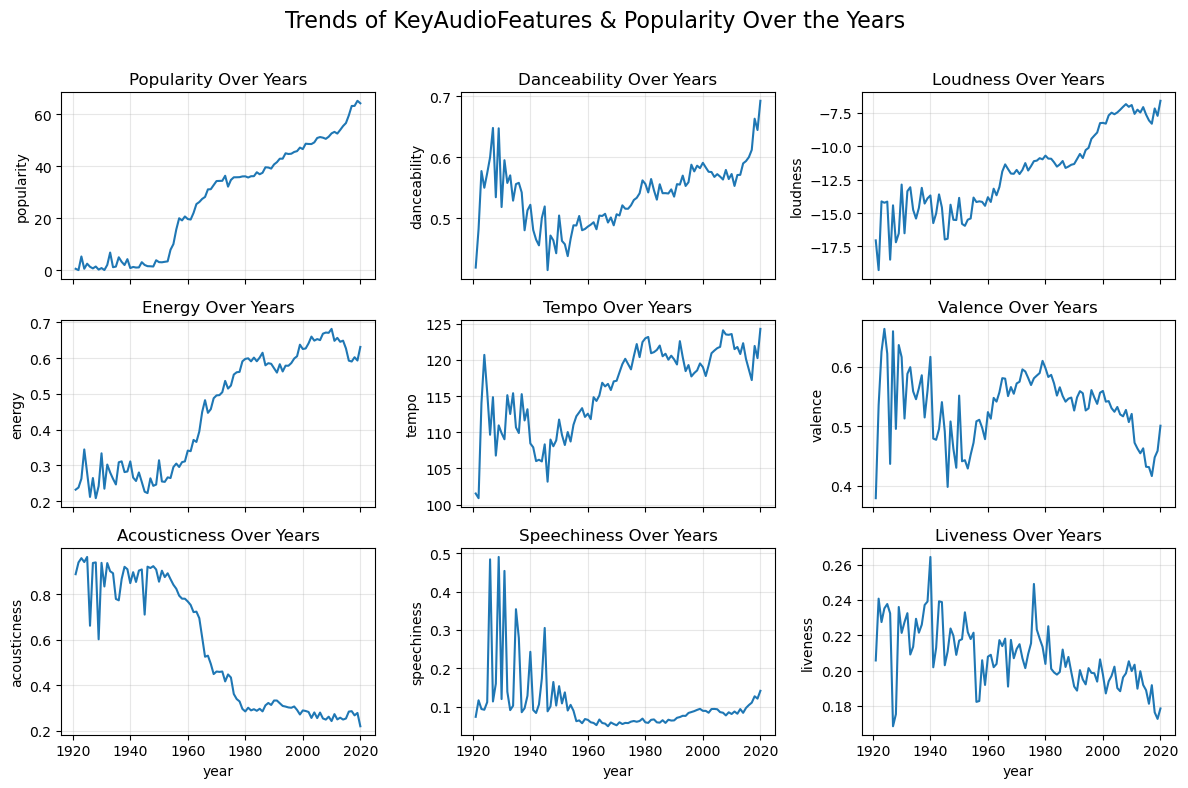

In [13]:
## EDA of data_by_year, to find trend over time ##

print("\n-- Data by YEAR from the dataset data_by_year.csv --")
print(f"Shape: {df_year.shape}")
print(df_year.head)

#plotting key audioFeatures to see trends over the years
keyAudioFeatures = ['popularity', 'danceability', 'loudness', 'energy', 'tempo', 'valence', 'acousticness', 'speechiness', 'liveness']

#prepare a large canvas for all the subplots
n=len(keyAudioFeatures)
ncols=3
nrows=(n+ncols-1)//ncols
fig,axes=plt.subplots(nrows,ncols,figsize=(12,8), sharex=True)
axes=axes.flatten()

#loop over the keyAudioFeatures to populate each subplot
for ax, feature in zip(axes, keyAudioFeatures):
    if feature in df_year.columns:
        sns.lineplot(x='year', y=feature, data=df_year,ax=ax)
        ax.set_title(f"{feature.capitalize()} Over Years")
        ax.grid(alpha=0.3)
for ax in axes[n:]:
    ax.axis('off')#turning off unused subplots
fig.tight_layout(rect=[0,0,1,0.92])#adjusting the layout
fig.suptitle("Trends of KeyAudioFeatures & Popularity Over the Years", y=0.98, fontsize=16)
plt.show()#showing all the subplots in one large canvas


-- Data by GENRE from the dataset data_by_genres.csv --
Shape: (2973, 14)
<bound method NDFrame.head of       mode                  genres  acousticness  danceability   duration_ms  \
0        1  21st century classical      0.979333      0.162883  1.602977e+05   
1        1                   432hz      0.494780      0.299333  1.048887e+06   
2        1                   8-bit      0.762000      0.712000  1.151770e+05   
3        1                      []      0.651417      0.529093  2.328809e+05   
4        1              a cappella      0.676557      0.538961  1.906285e+05   
...    ...                     ...           ...           ...           ...   
2968     1                    zolo      0.222625      0.547082  2.580991e+05   
2969     0                 zouglou      0.161000      0.863000  2.063200e+05   
2970     1                    zouk      0.263261      0.748889  3.060728e+05   
2971     0            zurich indie      0.993000      0.705667  1.984173e+05   
2972     1     

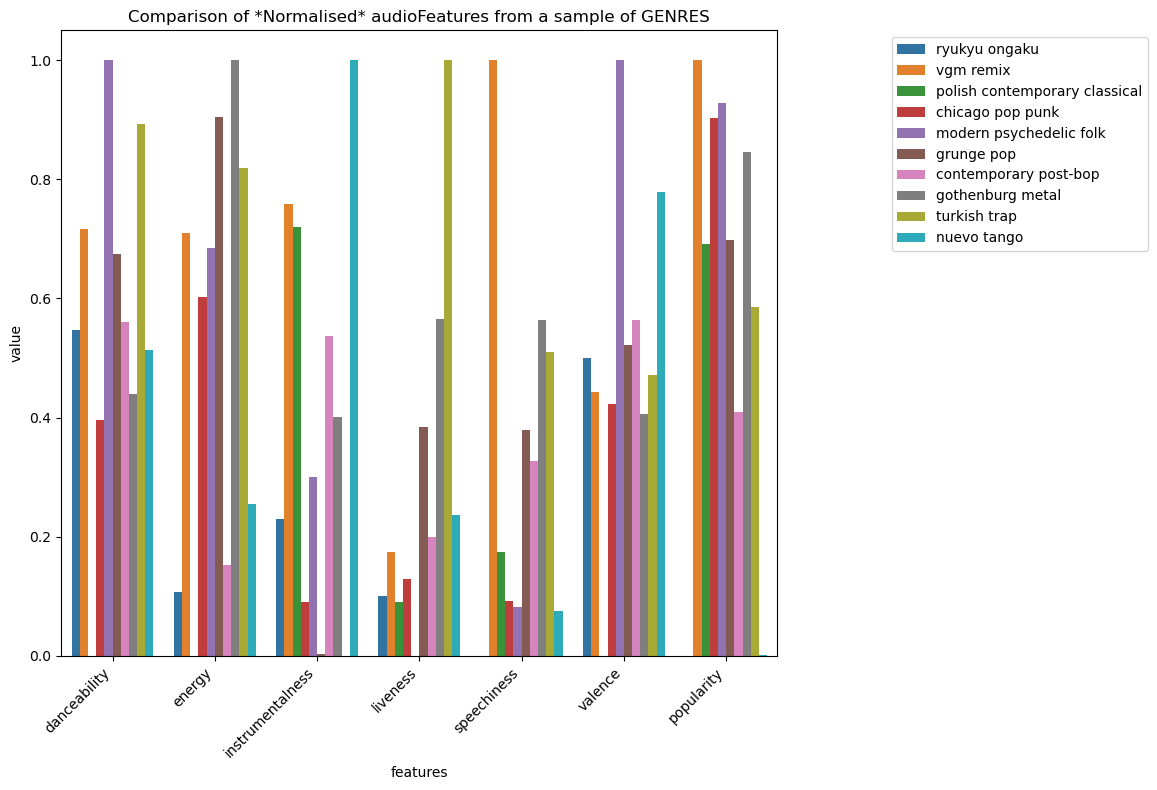

In [20]:
#EDA on the Genre characteristics, data_by_genre.csv ##

print("\n-- Data by GENRE from the dataset data_by_genres.csv --")
print(f"Shape: {df_genres.shape}")
print(df_genres.head)
print(f"\nNumber of Unique Genres: {df_genres['genres'].nunique()}")

#creating a small batch of genres for simplicity
sampleGenres = df_genres.sample(n=min(10, len(df_genres)), random_state=42)

#picking audio features for genre plotting
plotFeatures=[f for f in audioFeatures 
if (f in sampleGenres.columns 
and df_genres[f].dtype in ['float64', 'int64'] 
#filter the audio features with high variances to make the data plot ready
and f not in ['key', 'mode', 'time_signature', 'duration_ms', 'tempo', 'loudness'])]

#scaling eaxh column to [0,1]
scaled=sampleGenres.copy()
for feat in plotFeatures:
    col=scaled[feat]
    scaled[feat]=(col-col.min())/(col.max()-col.min())

#melting genres dataframe before plotting
meltedGenres=scaled.melt(id_vars=['genres'], value_vars=plotFeatures, var_name='features', value_name='value')
plt.figure(figsize=(12,8))
sns.barplot(x='features', y='value', hue='genres', data=meltedGenres)
plt.title('Comparison of *Normalised* audioFeatures from a sample of GENRES')
plt.xticks(rotation=45, ha='right')
plt.legend(bbox_to_anchor=(1.15, 1), loc=2)
plt.tight_layout()
plt.show()


-- Data by GENRE from the dataset data_by_artist.csv --
Shape: (28680, 15)
<bound method NDFrame.head of        mode  count  acousticness  \
0         1      9      0.590111   
1         1     26      0.862538   
2         1      7      0.856571   
3         1     27      0.884926   
4         1      7      0.510714   
...     ...    ...           ...   
28675     1      2      0.512000   
28676     0      2      0.541000   
28677     1     11      0.785455   
28678     1      2      0.381000   
28679     1      2      0.568000   

                                                 artists  danceability  \
0                       "cats" 1981 original london cast      0.467222   
1                              "cats" 1983 broadway cast      0.441731   
2            "fiddler on the roof” motion picture chorus      0.348286   
3         "fiddler on the roof” motion picture orchestra      0.425074   
4      "joseph and the amazing technicolor dreamcoat"...      0.467143   
...              

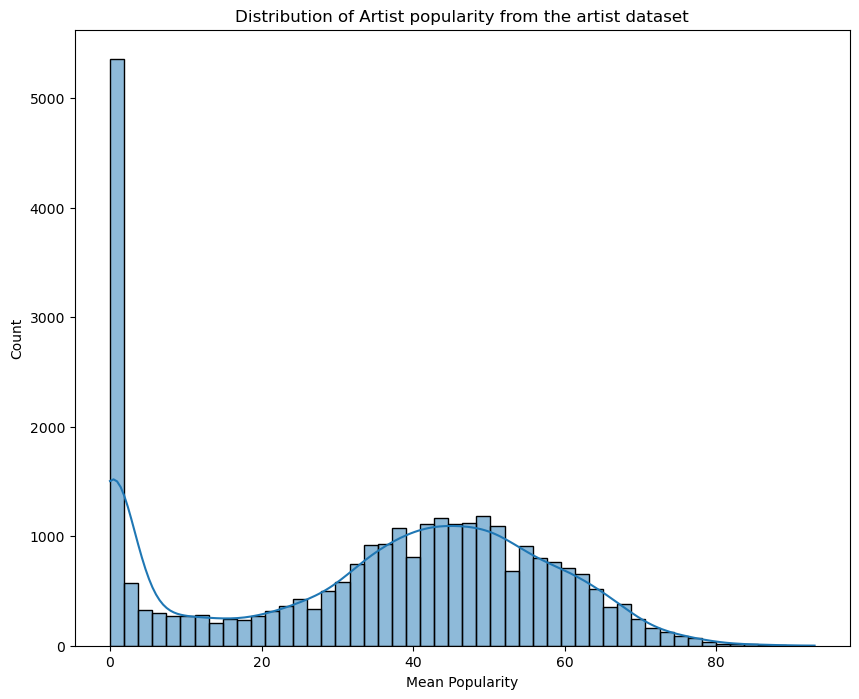


Top 10 artists by Mean Popularity from the Artist dataset
               artists  popularity  count
20966      ritt momney        93.0      2
14354        lele pons        92.0      1
15070  los legendarios        90.0      2
11764         jerry di        89.0      2
7463            emilee        88.0      2
23687        surf mesa        88.0      1
28263      salem ilese        88.0      2
213                a7s        87.0      3
2343           beltito        86.0      1
14378     lenny santos        86.0      2


In [21]:

#EDA on the ARTIST characteristics, data_by_artist.csv
print("\n-- Data by GENRE from the dataset data_by_artist.csv --")
print(f"Shape: {df_artist.shape}")
print(df_artist.head)
print(f"\nNumber of Unique Artists: {df_artist['artists'].nunique()}")

#distribution of artist popularity
if 'popularity' in df_artist.columns:
    plt.figure(figsize=(10, 8))
    sns.histplot(df_artist['popularity'], kde=True, bins=50)
    plt.title('Distribution of Artist popularity from the artist dataset')
    plt.xlabel('Mean Popularity')
    plt.show()

#top 10 artists by Popularity
if 'popularity' in df_artist.columns:
    print("\nTop 10 artists by Mean Popularity from the Artist dataset")
    print(df_artist.nlargest(10, 'popularity')[['artists', 'popularity', 'count']])

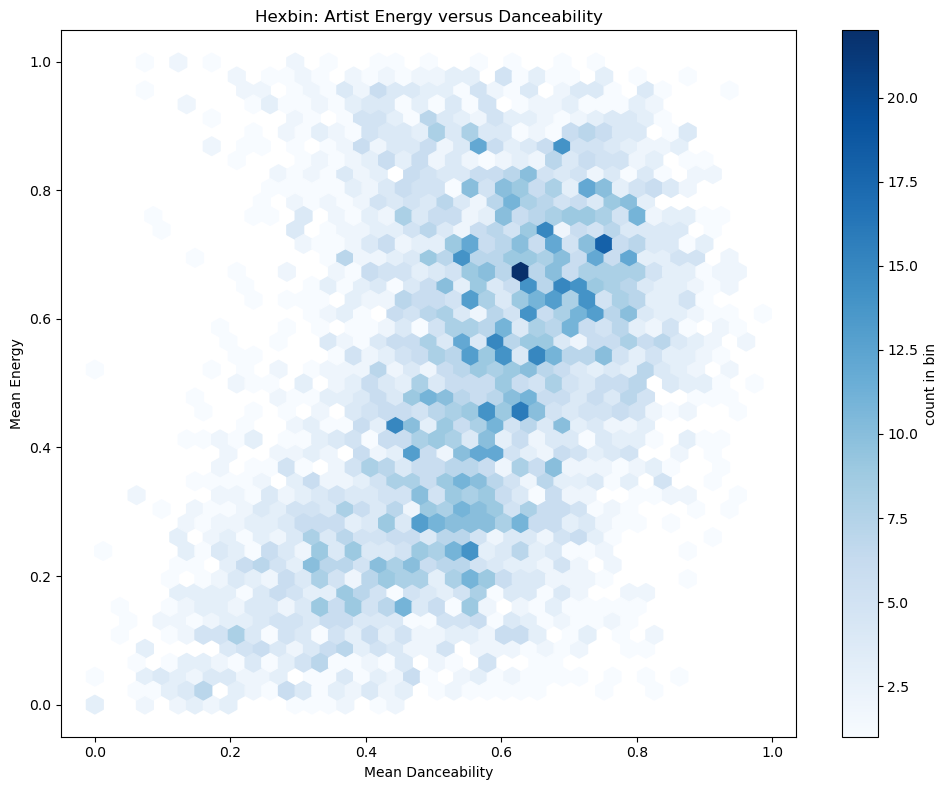

In [22]:
#scatterPlot showing energy against danceability 

if 'energy' in df_artist.columns and 'danceability' in df_artist.columns:

    #we create a sample of artists to avoid overplotting
    sampleOfArtist = (df_artist.sample(n=min(5000, len(df_artist)), random_state=1) if len(df_artist) > 0 else pd.DataFrame())
    if sampleOfArtist.empty:
        print("there is not enough artist data available")
    else:
        #setting up the big hexbin fig
        plt.figure(figsize=(10,8))
        hexBin=plt.hexbin(x=sampleOfArtist['danceability'], y=sampleOfArtist['energy'], gridsize=40,cmap='Blues',mincnt=1)
        countBin=plt.colorbar(hexBin)
        countBin.set_label('count in bin')
        plt.title("Hexbin: Artist Energy versus Danceability")
        plt.xlabel("Mean Danceability")
        plt.ylabel("Mean Energy")
        plt.tight_layout()#for tidying up
        plt.show()
else:
    print("data_by_artist.csv is empty or the columns we are looking for do not exist")

In [23]:
## RECOMMENDER SETUP ##

#data preparation for the recommender
if not df_data.empty and 'popularArtists' in df_data.columns:
    df_recommender=df_data.sample(frac=0.2, random_state=42)#use only 20% of the main dataset
    print(f"recommender dataset shape: {df_recommender.shape}")

    #selecting features for content-based filtering
    contentFeatures=['acousticness', 'danceability', 'energy', 'instrumentalness', 
    'liveness', 'loudness', 'tempo', 'speechiness', 'valence', 'duration_ms']

    #checking presence of these features in dataset
    contentFeatures=[f for f in contentFeatures if f in df_recommender.columns]
    if not contentFeatures:
        print("no content features available in the recommender dataframe")
        #dummy df recommender features
        dfRecommenderFeatures=pd.DataFrame()
    else:
        recommenderCols=['id', 'name', 'popularArtists', 'popularity'] + contentFeatures
        dfRecommenderFeatures=df_recommender[recommenderCols].copy()

        dfRecommenderFeatures.dropna(subset=contentFeatures, inplace=True)
        print(f"shape after dropping NA from contentFeatures: {dfRecommenderFeatures}")

        scaler=MinMaxScaler()
        dfRecommenderFeatures[contentFeatures]=scaler.fit_transform(dfRecommenderFeatures[contentFeatures])
        print("\nprocessed features for recommender {first 5 rows}:")
        print(dfRecommenderFeatures.head())
else:
    print("main datset is empty or popular artists column was not created")
    print(dfRecommenderFeatures)==pd.DataFrame()

recommender dataset shape: (34131, 21)
shape after dropping NA from contentFeatures:                             id  \
116368  0kdzyvsbqx1hv3ulxgm2jv   
161935  1f4eo5wac6glplxuhyklm2   
135703  1x07zff5kqt8dyj5kakvaq   
112288  5wmmdem4qvlfwqla2cvoks   
22      0sk1upzap6nvigf0ugh6z2   
...                        ...   
35373   4toylykhwpw98ktmignwqk   
114399  5wwinwiyslsgmbmh6n07na   
57863   5kdy8wl61y5cklf6supp8z   
134665  2ca5bow6fgouwvhtjzpubl   
83137   2kpj0ob7cuuhq3fuardoii   

                                                     name  \
116368                                      camby bolongo   
161935                           just one of those things   
135703                                          recognize   
112288                                      soul junction   
22                          flor marchita - remasterizado   
...                                                   ...   
35373                                ocean breathes salty   
114399            

In [24]:
##BUILDING the RECOMMENDER function

if not dfRecommenderFeatures.empty and 'id' in dfRecommenderFeatures.columns:
    itemsFeatureMatrix=dfRecommenderFeatures.set_index('id')[contentFeatures] #item feature matrix for cosine similarity
    cosineSimilarityMatrix = cosine_similarity(itemsFeatureMatrix) #calculating the cosine similarity
    #mapping the song index
    songId_to_index=pd.Series(itemsFeatureMatrix.index)
    index_to_songId=pd.Series(itemsFeatureMatrix.index.values, index=range(len(itemsFeatureMatrix.index)))
    print(f"cosine similarity matrix shape: {cosineSimilarityMatrix.shape}")

#generating hybrid recommendations for a given song id 
    def hybreedRecommender(song_id, N_content=50, K_final=10):
        if song_id not in songId_to_index.values:
            return f"Song ID {song_id} not found in the recommender dataset"
        songIndex=songId_to_index[songId_to_index == song_id].index[0] #getting index of song in the sim Matrix 
        similarityScores=list(enumerate(cosineSimilarityMatrix[songIndex])) #getting sim score for songs
        similarityScores=sorted(similarityScores,key=lambda x: x[1], reverse=True) #sorting songs based on sim score
        
        #getting the top N_content, most similar songs 
        topContentSongIndices=[i[0]for i in similarityScores[1:N_content+1]]
        topContentSongIds=index_to_songId[topContentSongIndices].tolist()

        #retrieving details of the recomnd songs + sim score
        recommendations= []
        for i, score_tuple in enumerate(similarityScores[1:N_content+1]):
            idx, score = score_tuple
            songDetails=dfRecommenderFeatures[dfRecommenderFeatures['id']==index_to_songId[idx]]
            if not songDetails.empty:
                recommendations.append({
                    'id': songDetails['id'].iloc[0],
                    'name': songDetails['name'].iloc[0],
                    'popularArtists': songDetails['popularArtists'].iloc[0],
                    'similarityScores': score,
                    'popularity': songDetails['popularity'].iloc[0]
                })

        recFunction=pd.DataFrame(recommendations)
        # re ranking songs by popularity
        recFunctionReranked=recFunction.sort_values(by='popularity', ascending=False)
        return recFunctionReranked.head(K_final)
    print("recommender function defined")
else:
    print("recommender features are empty,skipping recommendation!")


cosine similarity matrix shape: (34131, 34131)
recommender function defined


In [26]:
##SAMPLE RECOMMENDATION##

if not dfRecommenderFeatures.empty and 'hybreedRecommender' in locals() and len (dfRecommenderFeatures) >10:
    sampleSongs=dfRecommenderFeatures.sample(3, random_state=123)

    for idx, songRows in sampleSongs.iterrows():
        songIdtoRecommend=songRows['id']
        songNames=songRows['name']
        songArtist=songRows['popularArtists']
        print(f"\n~~~ Recommendations for: '{songNames}' by {songArtist} (ID: {songIdtoRecommend}) ~~~")

        recomendedSongs=hybreedRecommender(songIdtoRecommend, N_content=50, K_final=5)
        if isinstance(recomendedSongs, str):
            print(recomendedSongs)
        elif not recomendedSongs.empty:
            print(recomendedSongs[['name', 'popularArtists', 'similarityScores', 'popularity']])
        else:
            print("recommendation cannot be found")


~~~ Recommendations for: 'toothpaste kisses' by the maccabees (ID: 6jewgaprngyasrhucnuzkx) ~~~
                        name popularArtists  similarityScores  popularity
0             soldier's poem           muse          0.996063          49
21         solamente una vez  nat king cole          0.993308          42
7                   shy girl   the cascades          0.994649          38
27                  caminito    eydie gormé          0.992787          37
23  somebody - 2006 remaster   depeche mode          0.993074          34

~~~ Recommendations for: 'breathe in' by frou frou (ID: 03kzca43rgvgphyctcopju) ~~~
                         name            popularArtists  similarityScores  \
16            la media vuelta               luis miguel          0.997810   
41                      ginza                  j balvin          0.996785   
27  g walk (with chris brown)                 lil mosey          0.997291   
46                mi cómplice  cardenales de nuevo león          0.

In [27]:
##EVALS OF THE RECOMMENDER##

#creating a small test set of songs
if not dfRecommenderFeatures.empty and 'hybreedRecommender' in locals() and 'itemsFeatureMatrix' in locals() and len(dfRecommenderFeatures)>50: #ensuring enuf data for testing
    testSongIDs=dfRecommenderFeatures['id'].sample(n=min(50, len(dfRecommenderFeatures)-1), random_state=77).tolist()#ensuring songs are in itemFeatMatrix

    allMeanSimilarities=[]
    allMeanPopularities=[]
    print(f"evaluating the score on {len(testSongIDs)} test songs")

    for songIDtest in testSongIDs:
        recommendationsDF=hybreedRecommender(songIDtest, N_content=50, K_final=10)

        #Mean cosine similarity calc
        if isinstance(recommendationsDF, pd.DataFrame) and not recommendationsDF.empty:
            inputSongVector=itemsFeatureMatrix.loc[songIDtest].values.reshape(1, -1)#grabbing feature vector of input song
            recommendedIDs=recommendationsDF['id'].tolist()#grabbing feature vectors of recommended songs
            validRecommendedIDs=[rid for rid in recommendedIDs if rid in itemsFeatureMatrix.index]#filtering item featue matrix
            if validRecommendedIDs:
                recommendedVectors=itemsFeatureMatrix.loc[validRecommendedIDs].values
                #calculating cosine similarities between input and recommended songs
                similaritiesToInput=cosine_similarity(inputSongVector, recommendedVectors)[0]
                allMeanSimilarities.append(np.mean(similaritiesToInput)) 

        #Mean Popularity of Recommendations
        allMeanPopularities.append(recommendationsDF['popularity'].mean())
    
    #calculating the Total average Metrics
    totalMeanCosineSimilarity=np.mean(allMeanSimilarities) if allMeanSimilarities else 0
    totalMeanPopularityofRecs=np.mean(allMeanPopularities) if allMeanPopularities else 0

    print(f"\n~~~~  EVALS OUTPUT ~~~~")
    print(f"Number of Test Songs: {len(testSongIDs)}")
    print(f"Number of recommendations generated per song for eval:10")
    print(f"Mean Cosine Similarity of recommendations to input song:{totalMeanCosineSimilarity:.4f}")
    print(f"Mean Popularity of recommended songs: {totalMeanPopularityofRecs:.2f}")

    #calc average popularity in the recs datset
    avgPopsInRecDataset=dfRecommenderFeatures['popularity'].mean()
    print(f"average popoularity in recommender datset: {avgPopsInRecDataset:.2f}")
    print("TASK COMPLETED, END OF RS-OUTPUT!")
else:
    print("evals cant be performd")

evaluating the score on 50 test songs

~~~~  EVALS OUTPUT ~~~~
Number of Test Songs: 50
Number of recommendations generated per song for eval:10
Mean Cosine Similarity of recommendations to input song:0.9933
Mean Popularity of recommended songs: 54.31
average popoularity in recommender datset: 31.40
TASK COMPLETED, END OF RS-OUTPUT!
